<a href="https://colab.research.google.com/github/eziong/MachineLearning02/blob/master/Assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plot the training data


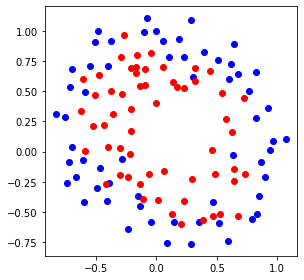

# Plot the training error with varying regularization parameters


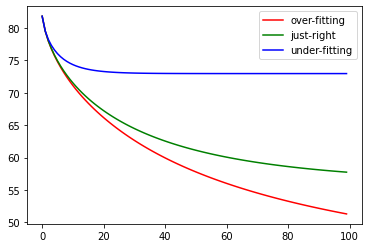

#Display the values of the chosen regularization parameters
over-fitting lambda  : 0.000000
just-right lambda    : 0.010000
under-fitting lambda : 0.100000
#Plot the training accuracy with varying regularization parameters


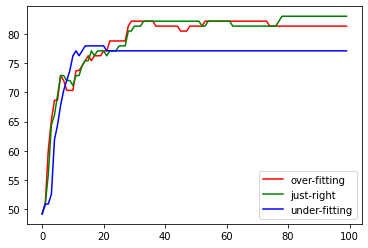

#Display the final training accuracy with varying regularization parameters
81.35593220338984 % accuracy - over-fitting 
83.05084745762711 % accuracy - just-right   
77.11864406779661 % accuracy - under-fitting
# Plot the optimal classifier with varying regularization parameters superimposed on the training data


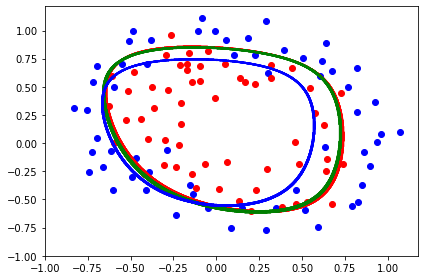

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as Latex

data = np.genfromtxt('data-nonlinear.txt', delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]


### Definitions of z, sigma, objective function, weight, high dimensional function
def z(theta,X):
  return g(theta,X)

def g(theta, X):
  z = 0
  for i in range(len(X)):
    z = z + theta[i]*X[i]
  return z

def sigma(z):
  return 1/(1+np.exp(-z))

def J(l,z,R):
  sum = 0
  for i in range(len(l)):
    sum = sum + l[i]*(-np.log(sigma(z[i])))+(1-l[i])*(-np.log(1-sigma(z[i])))
  return sum + R

def J_prime(_z,_l,_xi):
    return (sigma(_z)-_l)*_xi


def GD_algoritm(theta,z,l,X,alpha,Lambda):
  for i in range(len(l)):
    for j in range(len(X)):
      theta[j] = (1-alpha*Lambda)*theta[j] - alpha*w(z[i],l[i],X[j][i])
  return theta

def make_X(X):
  ret = []
  for i in range(10):
    for j in range(10):
      ret.append((X[0]**i)*(X[1]**j))
  return ret

def make_theta(X):
  ret = []
  for i in range(len(X)):
    ret.append(0)
  return ret

def w(z,l,xi):
  return J_prime(z,l,xi)

def accuracy_cal(z,l):
  res = 0
  for i in range(len(z)):
    if (sigma(z[i]) >=1/2 and l[i]==1) or (sigma(z[i]) <1/2 and l[i]==0):
      res = res + 1
  return res

def Regularization(Lambda,theta):
  sum = 0
  for theta_i in theta:
    sum = sum + theta_i
  return sum*Lambda/2

### Basic Settings
R_X = [pointX,pointY]
X = make_X(R_X)
l=label
theta_o = make_theta(X)
theta_r = make_theta(X)
theta_u = make_theta(X)
err_J_o = []
err_J_r = []
err_J_u = []
alpha = 1e-2 #learning rate
accuracy_o = []
accuracy_r = []
accuracy_u = []
Lambda_o = 0
Lambda_r = 0.01
Lambda_u = 0.1

### Plot the training error
## iteration of gradient decent until convergence
for _ in range(100):
  R_o = Regularization(Lambda_o,theta_o)
  R_r = Regularization(Lambda_r,theta_r)
  R_u = Regularization(Lambda_u,theta_u)
  zet_o = z(theta_o,X)
  zet_r = z(theta_r,X)
  zet_u = z(theta_u,X)
  J_val_o = J(l,zet_o,R_o)
  J_val_r = J(l,zet_r,R_r)
  J_val_u = J(l,zet_u,R_u)
  err_J_o.append(J_val_o)
  err_J_r.append(J_val_r)
  err_J_u.append(J_val_u)
  accuracy_val_o = accuracy_cal(zet_o,l) / len(l) * 100
  accuracy_val_r = accuracy_cal(zet_r,l) / len(l) * 100
  accuracy_val_u = accuracy_cal(zet_u,l) / len(l) * 100
  accuracy_o.append(accuracy_val_o)
  accuracy_r.append(accuracy_val_r)
  accuracy_u.append(accuracy_val_u)
  theta_o = GD_algoritm(theta_o,zet_o,l,X,alpha,Lambda_o)
  theta_r = GD_algoritm(theta_r,zet_r,l,X,alpha,Lambda_r)
  theta_u = GD_algoritm(theta_u,zet_u,l,X,alpha,Lambda_u)


def f_o(x,y):
  sum = 0
  rx = [x,y]
  tx = make_X(rx)
  for i in range(len(tx)):
    sum = sum + theta_o[i]*tx[i]
  return sigma(sum)

def f_r(x,y):
  sum = 0
  rx = [x,y]
  tx = make_X(rx)
  for i in range(len(tx)):
    sum = sum + theta_r[i]*tx[i]
  return sigma(sum)

def f_u(x,y):
  sum = 0
  rx = [x,y]
  tx = make_X(rx)
  for i in range(len(tx)):
    sum = sum + theta_u[i]*tx[i]
  return sigma(sum)


xx = np.linspace(-1,1,1000)
yy = np.linspace(-1,1,1000)
x_mesh,y_mesh = np.meshgrid(xx,yy)
zz_o = f_o(x_mesh,y_mesh)
zz_r = f_r(x_mesh,y_mesh)
zz_u = f_u(x_mesh,y_mesh)


#Plot the training data
print("#Plot the training data")
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#Plot the training error with varying regularization parameters
print("# Plot the training error with varying regularization parameters")
plt.plot(err_J_o,color='r',label='over-fitting')
plt.plot(err_J_r,color='g',label='just-right')
plt.plot(err_J_u,color='b',label='under-fitting')
plt.legend()
plt.show()

#Display the values of the chosen regularization parameters
print("#Display the values of the chosen regularization parameters")
print("over-fitting lambda  : \033[31m%f\033[00m"%(Lambda_o))
print("just-right lambda    : \033[32m%f\033[00m"%(Lambda_r))
print("under-fitting lambda : \033[34m%f\033[00m"%(Lambda_u))

#Plot the training accuracy with varying regularization parameters
print("#Plot the training accuracy with varying regularization parameters")
plt.plot(accuracy_o,color='r',label='over-fitting')
plt.plot(accuracy_r,color='g',label='just-right')
plt.plot(accuracy_u,color='b',label='under-fitting')
plt.legend()
plt.show()

#Display the final training accuracy with varying regularization parameters
print("#Display the final training accuracy with varying regularization parameters")
print("\033[31m{0} % accuracy - over-fitting \033[00m".format(accuracy_o[len(accuracy_o)-1]))
print("\033[32m{0} % accuracy - just-right   \033[00m".format(accuracy_r[len(accuracy_r)-1]))
print("\033[34m{0} % accuracy - under-fitting\033[00m".format(accuracy_u[len(accuracy_u)-1]))

# Plot the optimal classifier with varying regularization parameters superimposed on the training data
print("# Plot the optimal classifier with varying regularization parameters superimposed on the training data")
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.contour(x_mesh,y_mesh,np.round(zz_o,2)==0.5,colors='r')
plt.contour(x_mesh,y_mesh,np.round(zz_r,2)==0.5,colors='g')
plt.contour(x_mesh,y_mesh,np.round(zz_u,3)==0.5,colors='b')
plt.show()